In [51]:
# packages
import matplotlib.pyplot as plt
import matplotlib
import json
import numpy as np
import matplotlib.colors as mcolors
from matplotlib.pyplot import xticks
import sys
import pandas as pd
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
### stiffness = 2; damping = 20; cells = 1
# falloff = 1; strength = -1500

frames00 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199]
times00 = [5725, 122459, 221642, 319218, 413213, 505798, 600827, 706212, 813105, 915127, 1017792, 1124200, 1226045, 1327932, 1431011, 1532776, 1633852, 1737983, 1840234, 1939385, 2042992, 2147737, 2237057, 2323231, 2409632, 2501581, 2595183, 2693191, 2779069, 2865129, 2952692, 3039343, 3124917, 3218939, 3304752, 3397142, 3485034, 3571310, 3656936, 3744971, 3830311, 3917452, 4003538, 4103016, 4203047, 4287929, 4374068, 4458808, 4547293, 4640373, 4726320, 4812406, 4910582, 5007595, 5094202, 5182604, 5268084, 5353491, 5439830, 5524679, 5611365, 5695546, 5780637, 5867526, 5953393, 6038045, 6130412, 6220039, 6308588, 6393517, 6482767, 6571017, 6662181, 6752140, 6851246, 6952479, 7051442, 7152340, 7236478, 7322130, 7408468, 7494931, 7585614, 7672932, 7759126, 7856237, 7953422, 8041633, 8131787, 8219617, 8305388, 8389050, 8476828, 8568529, 8655255, 8741206, 8824821, 8910151, 8996028, 9083713, 9169876, 9255022, 9341324, 9425682, 9510469, 9594484, 9679529, 9766805, 9866283, 9964734, 10062714, 10164900, 10253390, 10342103, 10427910, 10520476, 10606395, 10692827, 10778068, 10871968, 10958414, 11045599, 11134718, 11224507, 11313322, 11399956, 11487258, 11572351, 11663793, 11754548, 11843660, 11931180, 12023754, 12123080, 12222758, 12321615, 12419582, 12504163, 12590651, 12675424, 12762565, 12849504, 12935911, 13023123, 13107801, 13192031, 13278140, 13364339, 13449360, 13534311, 13619766, 13704373, 13789654, 13876006, 13963952, 14047893, 14132528, 14225204, 14329381, 14435985, 14534203, 14633038, 14730400, 14824014, 14910445, 14999975, 15084598, 15174743, 15265544, 15350611, 15436519, 15521351, 15605086, 15690978, 15776606, 15863408, 15950646, 16036275, 16125666, 16217495, 16305563, 16392670, 16488494, 16575391, 16676904, 16776722, 16864422, 16953961, 17043308, 17127926, 17214987, 17300705, 17388772, 17491457, 17591001, 17688450, 17785730, 17883222, 17983344]

frames10 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199]
times10 = [6098, 125067, 230356, 332177, 431051, 530841, 631299, 734808, 833510, 941865, 1055883, 1161555, 1266349, 1371917, 1476329, 1578419, 1680581, 1783214, 1892742, 1995403, 2095730, 2198764, 2299913, 2400029, 2501811, 2591107, 2679856, 2775043, 2865914, 2953930, 3044525, 3137415, 3229509, 3320191, 3409060, 3507860, 3597968, 3690523, 3784194, 3885891, 3992184, 4104027, 4205849, 4305339, 4427588, 4533676, 4637225, 4738698, 4839661, 4941709, 5041638, 5132456, 5221197, 5309141, 5397245, 5488687, 5579758, 5694631, 5796229, 5904574, 6013732, 6122504, 6216886, 6302773, 6390979, 6480541, 6569629, 6658254, 6754107, 6843742, 6947863, 7048634, 7151583, 7253239, 7352181, 7451911, 7540140, 7628024, 7715780, 7803086, 7892172, 7979797, 8075471, 8167622, 8258252, 8357040, 8446402, 8542026, 8634627, 8725403, 8815294, 8903292, 8991628, 9080621, 9169694, 9257470, 9358714, 9461223, 9567042, 9670750, 9771349, 9871309, 9959209, 10046991, 10134755, 10222420, 10312979, 10401890, 10490928, 10584183, 10678014, 10765959, 10853683, 10946181, 11034699, 11121745, 11212541, 11301465, 11395932, 11483642, 11572458, 11661012, 11762195, 11862812, 11966828, 12067411, 12166704, 12269078, 12358625, 12452026, 12542914, 12633416, 12724109, 12811743, 12905751, 12993313, 13085109, 13174654, 13261711, 13351738, 13440633, 13530241, 13619853, 13709356, 13798690, 13886235, 13976944, 14064522, 14166861, 14267432, 14369164, 14470680, 14570467, 14672567, 14762639, 14853211, 14943037, 15033108, 15122694, 15211659, 15303813, 15395675, 15485929, 15574145, 15663291, 15754740, 15843898, 15937920, 16027015, 16114756, 16208541, 16297337, 16386987, 16474482, 16578005, 16684421, 16787900, 16888837, 16988097, 17088855, 17187611, 17289933, 17378070, 17469947, 17563518, 17651037, 17738297, 17827382, 17914513, 18002484, 18093407, 18186350, 18276428, 18368063, 18456770, 18550354, 18641204, 18730737, 18821230]

frames20 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199]
times20 = [6225, 145909, 258864, 367641, 475407, 581543, 686097, 789160, 897105, 1059455, 1249062, 1424778, 1530103, 1639854, 1747178, 1868431, 1986104, 2094693, 2199460, 2307400, 2412792, 2523453, 2627969, 2733549, 2841589, 2946467, 3056839, 3158483, 3258683, 3361592, 3453450, 3543686, 3632516, 3720581, 3810869, 3899259, 3990802, 4078419, 4168005, 4258576, 4355372, 4443233, 4535525, 4625128, 4714145, 4803642, 4892831, 4981946, 5071775, 5171995, 5273054, 5379255, 5487256, 5591276, 5693517, 5781665, 5869658, 5961452, 6049713, 6138158, 6226461, 6314556, 6406393, 6495538, 6586192, 6673476, 6769448, 6857744, 6947328, 7035504, 7124540, 7212663, 7301687, 7389974, 7479998, 7586122, 7689979, 7794581, 7896224, 7997479, 8099700, 8191395, 8289191, 8384988, 8474257, 8563895, 8652826, 8741227, 8828865, 8917874, 9007262, 9096483, 9194342, 9281614, 9378469, 9466606, 9558435, 9649555, 9738887, 9828829, 9917723, 10021837, 10122261, 10223585, 10333784, 10434108, 10543235, 10645779, 10747012, 10851728, 10951825, 11051046, 11148927, 11239606, 11333322, 11422681, 11513682, 11607470, 11700014, 11790985, 11882201, 11969824, 12059625, 12147154, 12235218, 12327652, 12417249, 12507554, 12599659, 12692721, 12785681, 12876411, 12990699, 13092910, 13195716, 13299792, 13404977, 13508254, 13610369, 13710814, 13801005, 13895145, 13988041, 14076453, 14166759, 14262535, 14359464, 14450003, 14539069, 14631273, 14720842, 14811252, 14904177, 14993045, 15082990, 15173582, 15271939, 15368233, 15461991, 15568794, 15674458, 15777714, 15881757, 15971309, 16059758, 16149435, 16239299, 16330037, 16420374, 16510614, 16616218, 16716844, 16812374, 16900980, 16991144, 17080427, 17167428, 17258486, 17352711, 17441181, 17535699, 17627378, 17716023, 17805892, 17895374, 17995406, 18086484, 18179909, 18271128, 18364495, 18460823, 18564074, 18668548, 18772635, 18877236, 18979475, 19083407, 19174863, 19264816]

frames30 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199]
times30 = [5009, 101918, 187241, 274212, 368403, 454022, 539929, 624541, 711537, 806663, 897392, 983231, 1071750, 1156750, 1247677, 1335554, 1421003, 1506860, 1591915, 1680382, 1773846, 1867768, 1958560, 2048186, 2139483, 2231324, 2324199, 2417150, 2506641, 2599116, 2689449, 2780449, 2876470, 2966970, 3071370, 3176435, 3288510, 3394228, 3503713, 3607958, 3713120, 3825993, 3940932, 4048580, 4151769, 4256875, 4366230, 4470265, 4574253, 4678685, 4781651, 4872725, 4966955, 5064955, 5155872, 5252349, 5349882, 5443181, 5534936, 5624822, 5715323, 5806145, 5900406, 5995083, 6087426, 6179336, 6272182, 6365817, 6456543, 6548019, 6652197, 6755386, 6861726, 6963168, 7068509, 7182200, 7292537, 7395319, 7499902, 7602671, 7704101, 7807129, 7912556, 8014648, 8119148, 8226100, 8340467, 8436583, 8530130, 8623251, 8715131, 8813491, 8905037, 8999857, 9089241, 9186415, 9280278, 9372551, 9461434, 9549977, 9640323, 9729853, 9823472, 9912567, 10002992, 10092931, 10184594, 10295332, 10406607, 10513163, 10617659, 10721492, 10834380, 10942339, 11046962, 11151279, 11254307, 11357188, 11453221, 11554327, 11646548, 11746678, 11840294, 11930542, 12019542, 12110097, 12202035, 12295247, 12387505, 12482658, 12576210, 12669242, 12759049, 12853080, 12944509, 13034218, 13128248, 13245382, 13360499, 13468874, 13575141, 13686386, 13793425, 13904148, 14017181, 14120707, 14228554, 14333989, 14439666, 14544359, 14644060, 14745397, 14856536, 14949794, 15050114, 15144875, 15243058, 15340204, 15431635, 15522913, 15616281, 15713335, 15814163, 15907272, 16002377, 16093219, 16185864, 16279838, 16371658, 16476712, 16581626, 16686417, 16792561, 16885249, 16977524, 17076805, 17174805, 17267871, 17358132, 17460733, 17564621, 17665955, 17775016, 17877870, 17980144, 18086952, 18198376, 18301981, 18396793, 18492024, 18586931, 18680132, 18776324, 18866696, 18962158, 19054195, 19150026, 19240359, 19332067]

frames40 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199]
times40 = [6992, 142186, 252090, 360967, 470856, 601731, 720057, 829868, 940217, 1051695, 1163354, 1270574, 1376843, 1482799, 1591994, 1697474, 1811322, 1917596, 2024036, 2151549, 2256513, 2362254, 2468245, 2574462, 2668923, 2760823, 2853495, 2949081, 3042469, 3140465, 3233570, 3325767, 3419279, 3512934, 3604295, 3712098, 3806230, 3900787, 4004715, 4100653, 4194797, 4288092, 4382736, 4491949, 4606283, 4701347, 4794478, 4889479, 4984240, 5078401, 5174370, 5278474, 5384256, 5487647, 5595887, 5702887, 5809112, 5914914, 6025228, 6134032, 6241855, 6348113, 6454411, 6570784, 6676978, 6782661, 6876003, 6968785, 7061372, 7154456, 7246895, 7339583, 7432379, 7531388, 7623765, 7715061, 7807683, 7899786, 7992107, 8085950, 8177495, 8270595, 8363340, 8457615, 8550201, 8656235, 8765618, 8872853, 8981686, 9090455, 9209522, 9333047, 9469216, 9594554, 9710584, 9816397, 9922279, 10027227, 10135280, 10240287, 10344376, 10451351, 10562928, 10655952, 10753659, 10854030, 10976623, 11086377, 11196163, 11311834, 11411007, 11505018, 11596937, 11690302, 11788818, 11883290, 11975182, 12070497, 12163300, 12256054, 12351010, 12454176, 12574095, 12682784, 12792864, 12911038, 13016555, 13121310, 13226359, 13331359, 13438303, 13549488, 13658657, 13766576, 13873215, 13981580, 14075246, 14171041, 14263956, 14359821, 14453702, 14546922, 14639329, 14732415, 14825699, 14919099, 15013047, 15106764, 15199165, 15292115, 15385293, 15484099, 15576890, 15675376, 15772036, 15881823, 15992087, 16097912, 16198586, 16297489, 16395521, 16503569, 16600712, 16710403, 16817208, 16925599, 17032966, 17142371, 17249347, 17356263, 17461695, 17567596, 17673147, 17778701, 17871173, 17964839, 18056339, 18150122, 18243668, 18341203, 18446012, 18539591, 18633693, 18734269, 18828958, 18924025, 19018782, 19114032, 19206758, 19301957, 19404975, 19499870, 19592850, 19702349, 19809208, 19920699, 20028309, 20135808, 20241661]


In [4]:
### stiffness = 2; damping = 20; cells = 2
# falloff = 1; strength = -1500

frames02 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199]
times02 = [14001, 164453, 313297, 457093, 603126, 751017, 914044, 1069849, 1221414, 1376116, 1530132, 1690606, 1850697, 2009323, 2175268, 2345389, 2515174, 2684838, 2860313, 3054257, 3222845, 3392309, 3563131, 3737517, 3908236, 4085911, 4253705, 4426448, 4598031, 4772831, 4941271, 5111788, 5285615, 5462778, 5657077, 5837317, 6011692, 6199210, 6373258, 6547838, 6730480, 6906165, 7081262, 7254746, 7428261, 7603997, 7777575, 7949616, 8129458, 8304953, 8480343, 8654043, 8833247, 9005998, 9179390, 9352407, 9527137, 9709797, 9885262, 10067823, 10242693, 10428577, 10620463, 10799636, 10971577, 11147213, 11320849, 11494722, 11672451, 11853894, 12029384, 12260029, 12471347, 12656318, 12840345, 13015256, 13190683, 13367598, 13544580, 13732157, 13952645, 14189282, 14369326, 14547324, 14725751, 14901164, 15084384, 15259380, 15436309, 15613624, 15793359, 15968846, 16144266, 16320573, 16527133, 16710565, 16887463, 17071652, 17250307, 17427739, 17603552, 17777165, 17951438, 18125148, 18296516, 18488539, 18666185, 18863786, 19040260, 19224633, 19397971, 19572513, 19748415, 19921699, 20095773, 20272217, 20453669, 20628719, 20804926, 20982752, 21164879, 21346481, 21521462, 21701155, 21880616, 22056936, 22231302, 22408502, 22589415, 22764983, 22944649, 23124738, 23307412, 23483948, 23681261, 23854371, 24027514, 24200919, 24379424, 24559600, 24733829, 24908594, 25081511, 25264456, 25442663, 25656504, 25900370, 26083563, 26258680, 26436277, 26620122, 26801906, 26999584, 27177103, 27366066, 27546593, 27719104, 27916857, 28095132, 28267823, 28443512, 28625108, 28805422, 28981389, 29157956, 29332319, 29514980, 29688171, 29865875, 30047653, 30241133, 30423316, 30597644, 30780740, 30951791, 31127251, 31303027, 31484289, 31660892, 31844070, 32022438, 32199939, 32381745, 32558901, 32744581, 32932144, 33107607, 33283084, 33466771, 33653275, 33849138, 34034657, 34206931, 34381598, 34558794, 34733696, 34913639, 35092841, 35267504]

frames12 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199]
times12 = [14833, 222505, 413747, 582585, 760359, 940793, 1126294, 1309611, 1492187, 1700231, 1921074, 2134096, 2316406, 2498848, 2684934, 2871720, 3062981, 3246013, 3438933, 3630901, 3864183, 4071409, 4273294, 4455449, 4634799, 4814604, 5003667, 5181429, 5362337, 5551206, 5730513, 5909190, 6090250, 6273486, 6458592, 6658190, 6843587, 7025017, 7207034, 7384200, 7572030, 7759285, 7937086, 8115345, 8296836, 8476134, 8657761, 8852042, 9034666, 9224236, 9421586, 9605139, 9791099, 9973513, 10163313, 10346306, 10528461, 10716843, 10899080, 11091505, 11287344, 11479125, 11669395, 11860130, 12044715, 12222599, 12400998, 12581768, 12758774, 12942136, 13132377, 13309324, 13494927, 13682331, 13874477, 14059089, 14242020, 14476226, 14757959, 15032718, 15302011, 15595195, 15934399, 16211346, 16501073, 16775175, 17048832, 17310353, 17601287, 17879186, 18168088, 18460088, 18734462, 19033519, 19284961, 19546203, 19831727, 20097979, 20393594, 20675234, 20965223, 21282617, 21563779, 21861941, 22142558, 22421530, 22711254, 23015489, 23318160, 23644238, 23955881, 24242599, 24524902, 24807667, 25087301, 25371059, 25652224, 25936130, 26232075, 26515524, 26798511, 27101629, 27393788, 27681157, 27976157, 28271750, 28536581, 28802702, 29124485, 29415003, 29696489, 29987018, 30302414, 30587650, 30852724, 31198654, 31493356, 31750545, 32033777, 32317044, 32608776, 32887311, 33189882, 33500969, 33831257, 34153707, 34437368, 34723938, 35025620, 35324465, 35619888, 35905229, 36187939, 36507902, 36801306, 37082208, 37347430, 37624142, 37906879, 38220784, 38586283, 38891531, 39188506, 39487025, 39769217, 40051174, 40351206, 40655290, 40949533, 41248708, 41558606, 41822448, 42090780, 42384034, 42682959, 42976936, 43258240, 43503719, 43785205, 44063139, 44355264, 44643465, 44937265, 45228791, 45497884, 45739834, 45926438, 46110976, 46296545, 46478843, 46662322, 46907959, 47176181, 47379237, 47563907, 47742338, 47922347, 48099124, 48277716]

frames22 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199]
times22 = [13210, 223287, 409312, 595884, 776881, 962334, 1144082, 1329883, 1515511, 1706430, 1898190, 2090265, 2286289, 2482003, 2671739, 2866267, 3094144, 3303661, 3496123, 3679332, 3863304, 4053307, 4235812, 4419194, 4602957, 4786762, 4968446, 5157989, 5361404, 5567051, 5750477, 5943437, 6126315, 6315153, 6496405, 6677746, 6861264, 7058445, 7248017, 7457300, 7657258, 7844245, 8027720, 8209588, 8391280, 8575287, 8764649, 8947179, 9129627, 9321025, 9528227, 9710329, 9892377, 10074056, 10259663, 10443109, 10633842, 10815935, 10999334, 11194712, 11379816, 11586647, 11768868, 11959902, 12146269, 12344841, 12532083, 12713670, 12905023, 13088948, 13303294, 13560315, 13784692, 13992556, 14193839, 14382963, 14565571, 14752514, 14971919, 15193795, 15404832, 15586657, 15772597, 15959509, 16153228, 16358427, 16561267, 16751820, 16939597, 17132111, 17321180, 17506922, 17694851, 17883005, 18077900, 18264784, 18471047, 18660607, 18842427, 19024661, 19212963, 19396508, 19584462, 19775669, 19957001, 20143626, 20331329, 20538387, 20724394, 20907598, 21094649, 21277073, 21468206, 21651614, 21836680, 22028625, 22223793, 22430768, 22640664, 22823135, 23004235, 23186470, 23376850, 23563543, 23747636, 23936115, 24119371, 24300295, 24488195, 24695034, 24877745, 25060995, 25251942, 25433353, 25617654, 25808580, 25990675, 26173557, 26357780, 26543986, 26729082, 26928551, 27115543, 27302507, 27508181, 27703925, 27883805, 28066392, 28251659, 28438819, 28620185, 28809221, 28989798, 29170058, 29360074, 29543644, 29727504, 29911152, 30096177, 30283298, 30498174, 30679311, 30865388, 31047672, 31236709, 31422647, 31606307, 31786163, 31975572, 32163804, 32359007, 32546585, 32732913, 32927474, 33110802, 33316915, 33501699, 33685707, 33869352, 34054768, 34244065, 34424564, 34607974, 34797565, 34980600, 35162131, 35348622, 35534227, 35738651, 35952111, 36134299, 36320448, 36506542, 36706994, 36889742, 37080520, 37269428, 37461170, 37648086]

frames32 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199]
times32 = [14002, 194544, 361128, 539383, 756887, 930720, 1108560, 1304960, 1496614, 1710351, 1910465, 2106512, 2299780, 2495313, 2686110, 2878822, 3082257, 3273673, 3468233, 3691006, 3899940, 4109918, 4292802, 4484484, 4680838, 4882776, 5072336, 5259666, 5452444, 5644974, 5833310, 6019805, 6205605, 6393731, 6609778, 6796259, 6982917, 7178884, 7364891, 7557106, 7745857, 7931275, 8117528, 8310684, 8521258, 8709817, 8905615, 9093924, 9283362, 9476080, 9669985, 9859755, 10060111, 10249249, 10469842, 10687425, 10877621, 11065622, 11251470, 11439065, 11632759, 11822917, 12012323, 12210493, 12395309, 12585668, 12798468, 13012714, 13210752, 13417918, 13631937, 13819965, 14020359, 14213879, 14414223, 14617037, 14818400, 15036882, 15262006, 15478960, 15670605, 15868297, 16063251, 16251827, 16441626, 16633571, 16825040, 17021327, 17227419, 17416935, 17653586, 17869568, 18059612, 18257159, 18449709, 18638810, 18838596, 19033951, 19223299, 19437550, 19636380, 19840649, 20062491, 20282027, 20471924, 20672265, 20871290, 21068434, 21272183, 21468825, 21659648, 21856140, 22047539, 22254196, 22476692, 22673162, 22869553, 23074318, 23265040, 23452789, 23642883, 23834610, 24024386, 24232490, 24435257, 24661209, 24887156, 25089225, 25280635, 25471017, 25672982, 25872070, 26069408, 26258294, 26450798, 26654050, 26877090, 27066089, 27263827, 27456704, 27648051, 27844604, 28034085, 28227120, 28426917, 28616455, 28824664, 29038416, 29250546, 29467219, 29669865, 29865020, 30055940, 30253893, 30441809, 30630747, 30819122, 31006897, 31194499, 31391130, 31602416, 31813040, 32007552, 32197009, 32385286, 32576350, 32764238, 32954314, 33149028, 33338854, 33531946, 33749112, 33941298, 34132412, 34318257, 34516927, 34712346, 34916825, 35112889, 35300237, 35495015, 35708320, 35924123, 36111613, 36299309, 36484903, 36681439, 36869508, 37055893, 37251689, 37440314, 37628940, 37814277, 38001961, 38190399, 38407460, 38595024, 38783018, 38977310]

frames42 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199]
times42 = [13837, 228601, 418325, 638052, 858768, 1066278, 1266873, 1458007, 1646898, 1836866, 2030617, 2255428, 2466478, 2688601, 2913303, 3127219, 3317095, 3507138, 3698223, 3887118, 4083449, 4279979, 4484741, 4681227, 4873709, 5116561, 5307810, 5498046, 5695995, 5887311, 6080730, 6281985, 6473230, 6665258, 6859570, 7077479, 7278387, 7469923, 7664794, 7866392, 8069795, 8270412, 8462035, 8653654, 8845605, 9067802, 9291225, 9498153, 9696259, 9890821, 10082043, 10276809, 10469384, 10665667, 10857483, 11046987, 11271071, 11464348, 11656011, 11848145, 12040267, 12236790, 12428353, 12618983, 12818625, 13009892, 13207976, 13421271, 13648732, 13838522, 14038879, 14239110, 14438791, 14643365, 14837417, 15029728, 15223071, 15417381, 15631422, 15847626, 16038983, 16239926, 16433551, 16623962, 16815727, 17009441, 17207822, 17404444, 17597021, 17798460, 18014047, 18226785, 18441695, 18634468, 18824572, 19023445, 19219721, 19416260, 19619113, 19817121, 20012066, 20208401, 20408398, 20629518, 20843584, 21036290, 21237369, 21428962, 21621081, 21821494, 22012660, 22214356, 22407081, 22600043, 22804126, 23021975, 23235608, 23430223, 23620597, 23818992, 24020246, 24219755, 24416852, 24622265, 24816890, 25018382, 25229528, 25446021, 25644337, 25835339, 26030984, 26231585, 26426211, 26621552, 26813197, 27008313, 27206229, 27407380, 27624047, 27848837, 28045016, 28249491, 28447066, 28637296, 28831179, 29034561, 29241510, 29440713, 29649879, 29875674, 30079564, 30279836, 30476297, 30678886, 30879568, 31074882, 31278471, 31474337, 31674913, 31897952, 32092878, 32293249, 32493709, 32693624, 32899590, 33100918, 33297621, 33490215, 33687470, 33911274, 34112753, 34315014, 34517363, 34730990, 34940912, 35141974, 35345654, 35550601, 35755185, 35970301, 36186061, 36416544, 36632943, 36851665, 37047525, 37243132, 37436696, 37635732, 37832879, 38034570, 38236444, 38439033, 38636936, 38857071, 39056271, 39266904, 39471060, 39668236, 39875667]

frames52 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199]
times52 = [13937, 198642, 388636, 569965, 764623, 976137, 1201470, 1410376, 1611663, 1808908, 2013867, 2212244, 2421830, 2620334, 2820403, 3047471, 3271529, 3496046, 3714924, 3909229, 4110514, 4305080, 4501980, 4698583, 4891502, 5091262, 5285507, 5478015, 5705645, 5906724, 6115187, 6315423, 6514173, 6718736, 6915736, 7108273, 7313942, 7508973, 7728214, 7922681, 8119116, 8324599, 8519404, 8726258, 8921654, 9115270, 9314694, 9509423, 9749437, 9948369, 10147064, 10355376, 10553222, 10749119, 10951901, 11155156, 11368130, 11573401, 11807867, 12073986, 12320389, 12540066, 12736310, 12934430, 13139656, 13335781, 13561762, 13798117, 14027415, 14228335, 14439137, 14662260, 14892003, 15090850, 15299202, 15494804, 15689079, 15894933, 16103286, 16312469, 16514451, 16712594, 16948831, 17148819, 17351390, 17548698, 17748930, 17959557, 18156173, 18353790, 18557024, 18755428, 18978464, 19200852, 19419759, 19644535, 19863801, 20059165, 20260466, 20456046, 20650822, 20860088, 21061444, 21272022, 21471313, 21677110, 21895408, 22094208, 22294258, 22493231, 22701349, 22899004, 23095356, 23299985, 23496140, 23693551, 23925256, 24122564, 24327115, 24525647, 24721505, 24928674, 25125694, 25321055, 25518524, 25715477, 25951430, 26180067, 26402331, 26613575, 26813370, 27013685, 27213868, 27412984, 27621680, 27819012, 28026234, 28235742, 28460843, 28682132, 28877889, 29081026, 29275618, 29473095, 29683283, 29877666, 30074570, 30269203, 30465263, 30695953, 30900817, 31104097, 31316965, 31519769, 31720213, 31930324, 32127586, 32331864, 32530779, 32752960, 32958793, 33157671, 33354685, 33550763, 33747221, 33952063, 34147517, 34354233, 34555169, 34778816, 35000512, 35223779, 35452602, 35673038, 35881728, 36094478, 36296192, 36496676, 36697215, 36892912, 37099014, 37298056, 37501630, 37731799, 37930543, 38131996, 38334495, 38542433, 38747446, 38943682, 39148835, 39354080, 39556006, 39776999, 40017367, 40244320, 40481316, 40687252, 40905760]


In [5]:
### stiffness = 2; damping = 20; cells = 3
# falloff = 1; strength = -1000

frames03 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199]
times03 = [26650, 268127, 495989, 695529, 912685, 1126947, 1344939, 1564107, 1782781, 2003111, 2219508, 2451982, 2694465, 2910508, 3126043, 3344849, 3564266, 3781750, 4005433, 4220515, 4440049, 4694905, 4937381, 5154670, 5371345, 5588219, 5811142, 6033571, 6251324, 6469068, 6700161, 6917621, 7135434, 7352800, 7596143, 7813412, 8032709, 8250052, 8466914, 8685672, 8933257, 9152622, 9371528, 9609949, 9853795, 10095643, 10314858, 10531944, 10761472, 10987697, 11206505, 11425564, 11649447, 11867256, 12105296, 12322434, 12540074, 12758209, 12974165, 13189858, 13405825, 13619803, 13842477, 14080951, 14320381, 14535186, 14749832, 14973745, 15195943, 15418930, 15644020, 15863207, 16086824, 16328876, 16546192, 16763057, 16979400, 17192142, 17408947, 17624568, 17839358, 18052734, 18292579, 18507741, 18724603, 18947877, 19161180, 19378045, 19593789, 19810400, 20027935, 20251097, 20498023, 20713745, 20933649, 21155856, 21372435, 21589664, 21806821, 22025663, 22242392, 22479361, 22718894, 22935188, 23150699, 23363262, 23579999, 23800079, 24017216, 24233075, 24446906, 24691022, 24907891, 25122616, 25345347, 25560720, 25775248, 26003824, 26224185, 26443479, 26686711, 26907493, 27122775, 27339112, 27555436, 27767970, 27983052, 28197854, 28416779, 28640344, 28883094, 29104842, 29320009, 29539732, 29758277, 29974729, 30197078, 30412146, 30626804, 30854657, 31102651, 31326886, 31544276, 31762547, 31978084, 32195022, 32416458, 32631534, 32850563, 33090438, 33305485, 33530556, 33745220, 33962387, 34179110, 34398383, 34613874, 34829998, 35068085, 35308587, 35525900, 35743648, 35964112, 36187225, 36407311, 36627071, 36843125, 37059546, 37301190, 37518757, 37734357, 37950230, 38164572, 38386334, 38602005, 38817731, 39035784, 39270569, 39508418, 39724251, 39945518, 40165216, 40379210, 40596671, 40814241, 41035488, 41251273, 41491165, 41705122, 41921775, 42137306, 42353103, 42568507, 42784490, 43002544, 43223371, 43449828, 43689862, 43905676]

frames13 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199]
times13 = [32559, 244794, 472968, 674108, 879306, 1103809, 1372363, 1638011, 1856636, 2084299, 2306287, 2530612, 2799899, 3036464, 3273144, 3496081, 3716219, 3937919, 4156737, 4375314, 4595109, 4811748, 5036407, 5268186, 5490483, 5718184, 5943002, 6170308, 6405763, 6660194, 6878611, 7100517, 7320200, 7543017, 7765365, 7988671, 8210689, 8437043, 8700104, 8923061, 9149705, 9384197, 9613338, 9840755, 10068916, 10289581, 10520940, 10747427, 10971832, 11198096, 11420074, 11645895, 11876580, 12131774, 12359194, 12584975, 12808814, 13028060, 13256792, 13486783, 13712614, 13936417, 14159359, 14391016, 14612920, 14857888, 15079702, 15295806, 15515692, 15735794, 15956161, 16183194, 16534583, 16849965, 17218243, 17596474, 17922645, 18257770, 18608788, 18942986, 19301588, 19669960, 20042021, 20397149, 20743260, 21091925, 21440495, 21799492, 22160158, 22507844, 22854474, 23207068, 23574873, 23898045, 24267842, 24647071, 24982529, 25363372, 25725925, 26077497, 26429548, 26792618, 27151688, 27486610, 27856885, 28210596, 28555109, 28913710, 29361858, 29697187, 30024398, 30368802, 30682806, 31032699, 31362168, 31691901, 32030412, 32386914, 32745229, 33088865, 33434362, 33792582, 34139288, 34511055, 34876274, 35235339, 35619872, 35997351, 36395824, 36761662, 37125766, 37481839, 37861425, 38229250, 38583675, 38935575, 39256564, 39590261, 39952750, 40319894, 40688061, 41053955, 41447301, 41818127, 42149785, 42486645, 42856514, 43246107, 43578763, 43937560, 44270639, 44629212, 44991186, 45351417, 45696825, 46043722, 46404103, 46785939, 47137480, 47513502, 47868162, 48223372, 48581231, 48951135, 49298863, 49658554, 50020541, 50347638, 50701338, 51071019, 51446697, 51788256, 52125920, 52455521, 52809420, 53182315, 53559961, 53914486, 54256078, 54584229, 54933296, 55304799, 55701557, 56043035, 56389200, 56731752, 57062367, 57399583, 57771119, 58147432, 58492901, 58818145, 59202562, 59575326, 59938686, 60267759, 60641352, 61074875, 61445387]

frames23 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199]
times23 = [30978, 264105, 467950, 670759, 877009, 1086904, 1305773, 1523384, 1751293, 1993364, 2240823, 2507691, 2738230, 2961378, 3187981, 3411840, 3636358, 3861471, 4081460, 4310540, 4561357, 4808750, 5053684, 5274244, 5491347, 5717371, 5935865, 6153593, 6372873, 6591483, 6809407, 7047622, 7272796, 7493441, 7723270, 7945856, 8171651, 8399083, 8622994, 8852103, 9117361, 9339773, 9556985, 9787395, 10005852, 10224771, 10442677, 10660285, 10879109, 11122563, 11340795, 11559037, 11776887, 11998292, 12225632, 12444543, 12671112, 12896837, 13138989, 13358886, 13585241, 13805682, 14023897, 14246035, 14463207, 14680682, 14900719, 15147008, 15366441, 15585939, 15805784, 16025875, 16249707, 16467460, 16690672, 16912735, 17157453, 17410038, 17667706, 17891126, 18111007, 18331746, 18554398, 18772736, 18992178, 19207218, 19427707, 19676932, 19895121, 20112797, 20338863, 20557873, 20778914, 20998748, 21218117, 21438407, 21684097, 21904603, 22123414, 22341740, 22559590, 22783113, 23008162, 23273349, 23553744, 23798585, 24047999, 24277767, 24499156, 24730523, 25008631, 25268215, 25485397, 25715076, 25988423, 26254868, 26502016, 26721505, 26940302, 27163533, 27382055, 27610647, 27831604, 28054624, 28279894, 28534122, 28752294, 28971978, 29191819, 29412247, 29631060, 29858227, 30076453, 30294300, 30537395, 30758259, 30978860, 31199275, 31416116, 31634969, 31851895, 32069713, 32290200, 32542511, 32766902, 32987136, 33208286, 33430248, 33647935, 33871530, 34089330, 34311208, 34558978, 34803664, 35047282, 35268103, 35484397, 35705092, 35923443, 36147831, 36366058, 36595217, 36811597, 37062721, 37284324, 37508144, 37735873, 37963945, 38185507, 38407155, 38626228, 38846009, 39089907, 39310107, 39528465, 39751126, 39973157, 40191514, 40412610, 40640682, 40860433, 41127563, 41351378, 41567631, 41788697, 42018777, 42239820, 42461942, 42688374, 42912426, 43163837, 43410002, 43654039, 43877109, 44097145, 44318867, 44539801, 44765839, 44986377]

frames33 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199]
times33 = [30411, 201000, 418916, 589636, 771121, 953595, 1137018, 1324432, 1512244, 1701835, 1897322, 2098941, 2302574, 2503736, 2713222, 2916190, 3115657, 3317297, 3518331, 3721690, 3935743, 4153013, 4369360, 4585918, 4824586, 5044332, 5266809, 5490842, 5710028, 5932636, 6154310, 6376976, 6607912, 6834769, 7077211, 7325717, 7568980, 7794128, 8011585, 8236896, 8454137, 8671146, 8891866, 9110248, 9326568, 9588770, 9826258, 10064411, 10303407, 10520753, 10737191, 10958905, 11175302, 11392320, 11609139, 11826690, 12044307, 12299470, 12540682, 12758496, 12977564, 13192896, 13408156, 13623344, 13840819, 14058245, 14281948, 14523186, 14741447, 14969174, 15185685, 15404380, 15621838, 15839128, 16057791, 16282689, 16525790, 16759153, 16976998, 17201523, 17427508, 17648630, 17869668, 18114615, 18379300, 18626237, 18869020, 19119463, 19336472, 19556610, 19834321, 20099598, 20322143, 20551810, 20771253, 20988123, 21232958, 21478458, 21719063, 21935905, 22158289, 22379266, 22599551, 22822196, 23040010, 23264989, 23506628, 23752036, 24022932, 24241994, 24462171, 24687651, 24915377, 25133464, 25350316, 25570683, 25813162, 26078803, 26319473, 26560383, 26778526, 26997376, 27220172, 27451081, 27675648, 27895519, 28114324, 28332542, 28572205, 28822769, 29062284, 29281778, 29502661, 29724201, 29941834, 30160954, 30379805, 30599283, 30816492, 31044470, 31304320, 31601898, 31868273, 32117465, 32345963, 32565807, 32789353, 33015377, 33231818, 33472238, 33692463, 33914663, 34157674, 34380859, 34603572, 34828075, 35047256, 35265947, 35484729, 35710578, 35931178, 36172926, 36413478, 36655486, 36899766, 37128174, 37350570, 37572488, 37792744, 38012248, 38228130, 38447970, 38666091, 38909533, 39128611, 39351241, 39570271, 39796597, 40016438, 40232352, 40452615, 40672242, 40916223, 41163977, 41380908, 41600516, 41819858, 42037958, 42262651, 42485750, 42705290, 42926137, 43171199, 43388470, 43606408, 43836393, 44057254, 44275737, 44497141]

frames43 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199]
times43 = [38122, 243599, 460183, 658442, 861840, 1070303, 1284347, 1499874, 1717519, 1939244, 2187012, 2411835, 2653852, 2878826, 3094957, 3311566, 3530450, 3753498, 3970657, 4198544, 4417454, 4654677, 4896732, 5113823, 5337069, 5560579, 5786441, 6012186, 6242560, 6462252, 6682560, 6956697, 7178194, 7399286, 7617166, 7838106, 8054810, 8279994, 8497897, 8716995, 8958739, 9204017, 9445073, 9684145, 9911721, 10139730, 10364547, 10592044, 10820404, 11090976, 11353450, 11581794, 11822665, 12069156, 12308996, 12540239, 12812882, 13072622, 13291583, 13507576, 13723786, 13944481, 14168350, 14409072, 14652554, 14891825, 15112850, 15336713, 15566564, 15785284, 16006460, 16275095, 16494571, 16715562, 16977910, 17224517, 17468412, 17686736, 17901361, 18120187, 18339479, 18561176, 18782257, 19000087, 19216997, 19481344, 19728547, 19946247, 20169916, 20398444, 20624875, 20854465, 21086077, 21309037, 21530764, 21793987, 22035823, 22274529, 22514304, 22738358, 22957385, 23172110, 23390681, 23608500, 23827203, 24050616, 24271618, 24516822, 24732465, 24950244, 25175672, 25406136, 25624814, 25845964, 26064212, 26280705, 26523499, 26777681, 26996405, 27213899, 27434775, 27653611, 27872340, 28097161, 28315952, 28557764, 28800945, 29069054, 29312471, 29535746, 29753455, 29969275, 30191619, 30412044, 30630909, 30848950, 31067224, 31306631, 31524610, 31745350, 31962156, 32179823, 32406848, 32627273, 32844273, 33062676, 33307721, 33526968, 33751708, 33969838, 34187111, 34414597, 34636587, 34856085, 35075847, 35327518, 35557291, 35782444, 36003654, 36221895, 36448013, 36666234, 36882570, 37100499, 37340194, 37604922, 37843943, 38069863, 38287169, 38504118, 38723569, 38943830, 39164362, 39407740, 39633288, 39875387, 40100500, 40332605, 40557062, 40791489, 41016277, 41243776, 41464973, 41685105, 41924489, 42154703, 42379380, 42603764, 42826422, 43053002, 43272741, 43491538, 43711657, 43959066, 44232028, 44477370, 44722799, 44947492, 45180172]

frames53 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199]
times53 = [32049, 243442, 445200, 655838, 867649, 1085250, 1304385, 1522572, 1766749, 2015426, 2264383, 2504883, 2726748, 2946676, 3168056, 3394148, 3611948, 3827693, 4043504, 4258744, 4506998, 4756931, 5000547, 5236173, 5468833, 5697070, 5921662, 6145478, 6368207, 6591213, 6811434, 7056010, 7277812, 7505877, 7743893, 7968765, 8191670, 8416496, 8642204, 8864224, 9114094, 9356627, 9647065, 9891687, 10114666, 10340681, 10561868, 10790728, 11011330, 11230641, 11453410, 11699753, 11946481, 12219614, 12464988, 12693004, 12915116, 13138306, 13359884, 13592019, 13820777, 14078418, 14348410, 14593784, 14837263, 15054076, 15273925, 15521773, 15789669, 16039119, 16258078, 16482220, 16700980, 16940328, 17181641, 17424643, 17675748, 17898652, 18129665, 18352882, 18572490, 18796427, 19013831, 19231863, 19454122, 19699854, 19918482, 20141345, 20359318, 20581410, 20801074, 21026522, 21245987, 21465439, 21707388, 21948985, 22191872, 22443020, 22670826, 22892183, 23115853, 23338134, 23557049, 23776919, 23995121, 24213323, 24456413, 24682423, 24903382, 25124401, 25350332, 25569883, 25790014, 26010275, 26232469, 26474217, 26702688, 26921294, 27140423, 27360800, 27581972, 27808605, 28030905, 28253295, 28498568, 28763077, 29002489, 29219464, 29439283, 29664510, 29884603, 30104697, 30324386, 30542251, 30762245, 31014048, 31255669, 31476361, 31694679, 31912991, 32131315, 32350354, 32572217, 32845213, 33067596, 33316143, 33582648, 33826945, 34053777, 34271577, 34491983, 34710373, 34929193, 35149942, 35369939, 35599427, 35843389, 36060799, 36279485, 36501571, 36720407, 36939941, 37157682, 37375827, 37602624, 37879573, 38123378, 38353574, 38574638, 38793550, 39013340, 39231040, 39448110, 39665699, 39915713, 40156259, 40421700, 40658694, 40873904, 41090010, 41309262, 41528107, 41755777, 41976147, 42192130, 42414834, 42679798, 42904221, 43129621, 43351805, 43570843, 43790706, 44011005, 44239330, 44457581, 44704162, 44947864, 45216704, 45459716]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


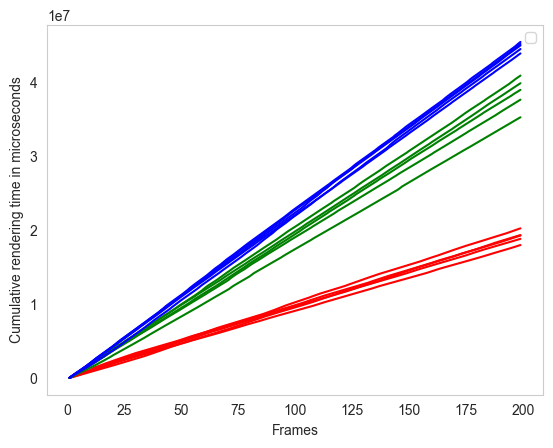

In [9]:
from matplotlib.cm import ScalarMappable
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.lines import Line2D
from matplotlib.pyplot import xticks

fig, ax = plt.subplots()

ax.plot(frames00, times00, color = 'red')
ax.plot(frames10, times10, color = 'red')
ax.plot(frames20, times20, color = 'red')
ax.plot(frames30, times30, color = 'red')
ax.plot(frames40, times40, color = 'red')

ax.plot(frames02, times02, color = 'green')
#ax.plot(frames12, times12, color = 'green')
ax.plot(frames22, times22, color = 'green')
ax.plot(frames32, times32, color = 'green')
ax.plot(frames42, times42, color = 'green')
ax.plot(frames52, times52, color = 'green')

ax.plot(frames03, times03, color = 'blue')
#ax.plot(frames13, times13, color = 'red')
ax.plot(frames23, times23, color = 'blue')
ax.plot(frames33, times33, color = 'blue')
ax.plot(frames43, times43, color = 'blue')
ax.plot(frames53, times53, color = 'blue')

ax.legend()
plt.ylabel('Cumulative rendering time in microseconds')
plt.xlabel('Frames')
ax.grid(False)
locs, labels = xticks()

#plt.legend(title = r'Force strength = -1500', prop={'size': 1})

plt.show()

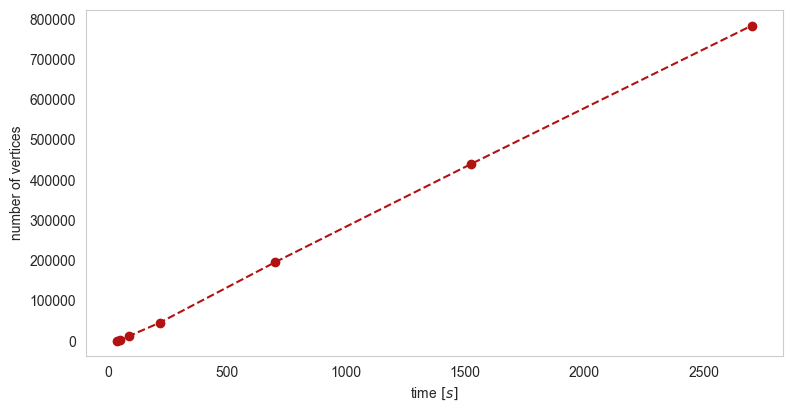

In [54]:
# rendering time for cell doublet - manually, against number of vertices in the scene
#sns.set_style("whitegrid")

times = [39.977, 51.524, 88, 216.505, 701.363, 1525.817, 2701.701]
vertices = [896, 3104, 12224, 45396, 195776, 440288, 783392]
faces = [888, 3098, 12216, 45390, 195778, 440280, 783384]

enum = list(range(len(times)))
hsv2rgb = lambda hue: mcolors.hsv_to_rgb([hue,0.9,0.7])
hues = np.linspace(0, 0.7, len(enum))
colors = [hsv2rgb(hue) for hue in hues]

fig, ax = plt.subplots(1, figsize = (9, 4.5))
blue, = sns.color_palette("muted", 1)

ax.plot(times, vertices, 'o--', color = colors[0])

plt.ylabel('number of vertices')
plt.xlabel('time $[s]$')
ax.grid()    

plt.savefig("M:\Goo-rendering\\simulation_time.png", dpi=500, transparent=False)
#plt.show()
